# Uplift model

In [2]:
import pandas as pd
import numpy as np
import datetime

# EDA

In [114]:
train = pd.read_csv('train/train.csv')

In [3]:
actions = pd.read_csv('messages/actions.csv')
messages = pd.read_csv('messages/messages.csv')

actions.shape, messages.shape

((962, 4), (18275907, 3))

In [4]:
messages['datetime'] = messages['sent'].apply(lambda x: 
                                              datetime.datetime.utcfromtimestamp(x))

In [5]:
messages['datetime_str'] = messages['sent'].apply(lambda x: 
                                              datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%dT%H:%M:%SZ'))

In [18]:
messages['order_month'] = messages['datetime_str'].apply(lambda x: x[:7])

In [7]:
messages['date'] = messages['datetime'].apply(lambda x: x.date())

In [8]:
messages = messages.merge(actions,
              left_on='action_id',
              right_on='id',
              how='left')

In [112]:
pd.crosstab(messages['order_month'], messages['type'])

type,email,push,sms
order_month,,,
2020-01,27153,235055,0
2020-02,45369,527105,0
2020-03,48917,622147,0
2020-04,350795,1283408,0
2020-05,222670,2909471,0
2020-06,247387,2203203,0
2020-07,455450,5146939,0
2020-08,743905,2916929,290004


In [17]:
messages.head()

,sent,action_id,user_id,datetime,datetime_str,month_str,date,id,subject,body,type
0,1.588847e+09,1512.0,1775692,2020-05-07 10:26:54,2020-05-07T10:26:54Z,2020-05,2020-05-07,1512,Сегодня готовим брауни с M&M's 😋 Приступим?,Видео рецепт и все необходимые ингредиенты уже...,email
1,1.588847e+09,1512.0,1775687,2020-05-07 10:26:44,2020-05-07T10:26:44Z,2020-05,2020-05-07,1512,Сегодня готовим брауни с M&M's 😋 Приступим?,Видео рецепт и все необходимые ингредиенты уже...,email
2,1.588847e+09,1512.0,1775684,2020-05-07 10:26:32,2020-05-07T10:26:32Z,2020-05,2020-05-07,1512,Сегодня готовим брауни с M&M's 😋 Приступим?,Видео рецепт и все необходимые ингредиенты уже...,email
3,1.588847e+09,1512.0,1775678,2020-05-07 10:25:56,2020-05-07T10:25:56Z,2020-05,2020-05-07,1512,Сегодня готовим брауни с M&M's 😋 Приступим?,Видео рецепт и все необходимые ингредиенты уже...,email
4,1.588847e+09,1512.0,1775660,2020-05-07 10:24:20,2020-05-07T10:24:20Z,2020-05,2020-05-07,1512,Сегодня готовим брауни с M&M's 😋 Приступим?,Видео рецепт и все необходимые ингредиенты уже...,email


In [11]:
shipments1 = pd.read_csv('shipments/shipments2020-01-01.csv')
shipments3 = pd.read_csv('shipments/shipments2020-03-01.csv')
shipments4 = pd.read_csv('shipments/shipments2020-04-30.csv')
shipments6 = pd.read_csv('shipments/shipments2020-06-29.csv')

In [12]:
shipments = pd.concat([shipments1,
                        shipments3,
                        shipments4,
                        shipments6])

shipments.shape

(2260686, 20)

In [16]:
shipments.head()

,user_id,ship_address_id,shipment_id,order_id,order_created_at,order_completed_at,shipment_starts_at,retailer,s.order_state,shipment_state,...,rate,dw_kind,promo_total,total_weight,platform,os,shipped_at,id,phone_id,order_month
0,11019,171906,322307,2156687,2017-08-03 21:25:23,2020-02-18 14:07:00,2020-02-20 07:00:00,METRO,complete,shipped,...,0,courier,0.0,30170,web,windows,2020-02-20 08:08:54,171906,78177,2020-02
1,62278,278832,387023,3021953,2018-03-02 17:22:04,2020-01-03 13:09:26,2020-01-03 17:00:00,METRO,complete,shipped,...,0,courier,-150.0,11305,web,windows,2020-01-03 18:10:40,278832,96681,2020-01
2,905126,468407,388943,3018198,2018-02-28 11:32:47,2020-02-12 12:39:28,2020-02-13 11:00:00,METRO,complete,shipped,...,5,courier,0.0,13589,app,ios,2020-02-13 12:33:53,468407,140317,2020-02
3,21412,61962,421048,3030227,2018-03-07 20:37:27,2020-01-25 11:58:56,2020-01-25 18:00:00,METRO,complete,shipped,...,0,courier,0.0,9726,web,mac,2020-01-25 19:55:32,61962,16,2020-01
4,42110,378297,442659,2923996,2017-12-24 11:19:04,2020-01-07 14:30:44,2020-01-07 19:00:00,METRO,complete,shipped,...,0,courier,0.0,30323,web,windows,2020-01-07 19:51:37,378297,60075,2020-01


In [14]:
addresses_df = pd.read_csv('misc/addresses.csv')
addresses_df = addresses_df.drop_duplicates()

In [15]:
shipments = pd.merge(shipments, addresses_df, left_on ='ship_address_id', right_on = 'id')
shipments['order_month'] = shipments['order_completed_at'].apply(lambda x: x[:7])

In [21]:
shipments.merge(messages,
               on=['user_id', 'order_month'],
               how='left').shape

(18589108, 33)

In [23]:
shipments_messages = shipments.merge(messages,
               on=['user_id', 'order_month'],
               how='left')

In [35]:
shipments_messages.head()

,user_id,ship_address_id,shipment_id,order_id,order_created_at,order_completed_at,shipment_starts_at,retailer,s.order_state,shipment_state,...,sent,action_id,datetime,datetime_str,month_str,date,id_y,subject,body,type
0,11019,171906,322307,2156687,2017-08-03 21:25:23,2020-02-18 14:07:00,2020-02-20 07:00:00,METRO,complete,shipped,...,1.582121e+09,1096.0,2020-02-19 14:07:09,2020-02-19T14:07:09Z,2020-02,2020-02-19,1096.0,Тебя ждёт БЕСПЛАТНАЯ доставка от СберМаркета💰,"Успей заказать любимые товары, а мы доставим Б...",email
1,62278,278832,387023,3021953,2018-03-02 17:22:04,2020-01-03 13:09:26,2020-01-03 17:00:00,METRO,complete,shipped,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,905126,468407,388943,3018198,2018-02-28 11:32:47,2020-02-12 12:39:28,2020-02-13 11:00:00,METRO,complete,shipped,...,1.581597e+09,1175.0,2020-02-13 12:33:58,2020-02-13T12:33:58Z,2020-02,2020-02-13,1175.0,Поздравляем! Вам подарок – 2000 рублей на урок...,NaN,email
3,905126,468407,388943,3018198,2018-02-28 11:32:47,2020-02-12 12:39:28,2020-02-13 11:00:00,METRO,complete,shipped,...,1.581425e+09,1011.0,2020-02-11 12:45:28,2020-02-11T12:45:28Z,2020-02,2020-02-11,1011.0,"Закажите продукты в СберМаркете, а мы привезем...",1-ая доставка всего за 98 рублей,email
4,905126,468407,388943,3018198,2018-02-28 11:32:47,2020-02-12 12:39:28,2020-02-13 11:00:00,METRO,complete,shipped,...,1.581684e+09,1096.0,2020-02-14 12:34:00,2020-02-14T12:34:00Z,2020-02,2020-02-14,1096.0,Тебя ждёт БЕСПЛАТНАЯ доставка от СберМаркета💰,"Успей заказать любимые товары, а мы доставим Б...",email


In [ ]:
shipments_messages['subject'].unique()

In [42]:
check_all = shipments_messages.groupby(['phone_id', 'order_month', 'type'], as_index=False).agg({
    'subject': lambda x: len(set(x))
})

In [44]:
check_all[check_all['type'] == 'push']['subject'].value_counts()

4     207589
5     157634
3     141477
6      90267
2      86815
7      61562
8      32571
1      32015
9      18450
10      4039
11      1593
12       620
13       159
14        32
15        13
16         4
17         2
Name: subject, dtype: int64

In [45]:
check_all[check_all['type'] == 'email']['subject'].value_counts()

1     227593
2     155767
3      99041
4      54554
5      30833
6      18769
7       7455
8       3699
9       1152
10       518
11       110
12        46
13        23
14         4
15         1
Name: subject, dtype: int64

# Data for uplift

In [50]:
df1 = shipments_messages[
    (shipments_messages['order_month'] == '2020-06')
    &(shipments_messages['type'] == 'push')]

pd.crosstab(df1['phone_id'], df1['subject'])

subject,А не пора ли пополнить запасы {{event.product.name}},Доставляем и из Ашана 🚛🚛🚛,Можете заказать в 1 из любимых магазинов 💚,Мы расширили зону доставки 🚀,Обновите приложение и оставайтесь дома,Скидка {{event.product.discount_percent}}% на ваш любимый товар,Скидки от нас и не только 🤗,Спасибо за выбор Сбермаркета!,Теперь доставляем и из Ашана 🚀🚀🚀,Теперь доставляем и из Ленты 🚀🚀🚀,Теперь заказывать стало проще!,Урра 🤩 БЕСПЛАТНАЯ доставка в СберМаркет😍,Урра! 🤩 БЕСПЛАТНАЯ доставка в СберМаркет😍,Успей использовать промокод от СберМаркет🤩,🚀Псс..Теперь мы доставляем из Ленты😎
phone_id,,,,,,,,,,,,,,,
6,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0
16,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,2,2,0,0,0,14,0,0,0,0
20,0,0,7,0,0,14,7,0,0,0,35,0,0,0,0
25,6,0,6,0,0,12,6,0,0,0,42,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717440,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
717446,0,0,1,0,0,0,1,0,0,0,3,0,0,0,0
717458,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0


In [51]:
df1['subject'].value_counts()

Теперь заказывать стало проще!                                     1064709
Скидка {{event.product.discount_percent}}% на ваш любимый товар     314410
Скидки от нас и не только 🤗                                         203595
Можете заказать в 1 из любимых магазинов 💚                          172836
Обновите приложение и оставайтесь дома                               38415
А не пора ли пополнить запасы {{event.product.name}}                 17403
Спасибо за выбор Сбермаркета!                                         7419
Успей использовать промокод от СберМаркет🤩                            3793
Урра 🤩 БЕСПЛАТНАЯ доставка в СберМаркет😍                              3552
Урра! 🤩 БЕСПЛАТНАЯ доставка в СберМаркет😍                             3249
Теперь доставляем и из Ашана 🚀🚀🚀                                      2580
Доставляем и из Ашана 🚛🚛🚛                                             2570
Теперь доставляем и из Ленты 🚀🚀🚀                                      2396
Мы расширили зону доставк

### Treatment = 1 users

In [56]:
users_treatment = \
    df1[df1['subject'] == 'Скидка {{event.product.discount_percent}}% на ваш любимый товар']['phone_id'].unique()

In [113]:
users_treatment

array([213286, 213315, 171453, ...,   1369, 131845, 523492])

### All users

In [58]:
users_all = shipments_messages[
    (shipments_messages['order_month'] == '2020-06')]['phone_id'].unique()

### target - в след месяце 

In [116]:
train

,phone_id,order_completed_at,target
0,19843,2020-01,1.0
1,19843,2020-02,0.0
2,19843,2020-03,0.0
3,19843,2020-04,0.0
4,19843,2020-05,0.0
...,...,...,...
1159571,23853,2020-03,0.0
1159572,23853,2020-04,0.0
1159573,23853,2020-05,0.0
1159574,23853,2020-06,1.0


In [125]:
train[train['order_completed_at'] == '2020-06'][['phone_id', 'target']]

,phone_id,target
5,19843,0.0
8,173074,0.0
15,101944,0.0
19,615032,0.0
26,342522,1.0
...,...,...
1159549,69348,1.0
1159556,137908,0.0
1159560,320024,1.0
1159567,346461,0.0


# Модель

# Наша библиотека по uplift

- используем ClassTransformation метод и метрики из нее

https://github.com/maks-sh/scikit-uplift

`pip install scikit-uplift`

### Туториал по uplift

https://habr.com/ru/company/ru_mts/blog/485976/

In [ ]:
import sys
!{sys.executable} -m pip install scikit-uplift

In [121]:
from sklift.models import ClassTransformation
from catboost import CatBoostClassifier

In [122]:
feat = pd.read_csv('train_feat_upd.csv')

In [123]:
feat.head()

,phone_id,order_month,user_id_cnt,ship_address_id_cnt,shipment_id_cnt,order_id_cnt,store_id_cnt,total_cost_min,total_cost_max,total_cost_sum,...,os_ios,os_mac,os_windows,shipment_state_canceled,shipment_state_shipped,shipment_state_shipping,shipment_state_ready,dw_kind_courier,order_completed_at,target
0,9,2020-06,1,2,2,2,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2020-06,1.0
1,140,2020-05,1,7,7,7,1,0.0,158.0,948.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2020-05,1.0
2,143,2020-06,1,1,1,1,1,158.0,158.0,158.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2020-06,0.0
3,183,2020-03,1,4,4,4,2,0.0,162.0,320.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2020-03,1.0
4,235,2020-07,1,4,4,4,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2020-07,1.0


In [137]:
df_train = feat.merge(
    train[train['order_completed_at'] == '2020-06'][['phone_id', 'order_completed_at']],
    left_on=['phone_id', 'order_month'],
    right_on=['phone_id', 'order_completed_at'],
    how='inner'
).drop(['order_completed_at_x', 'order_completed_at_y'], axis=1)

df_train.shape

(155582, 88)

In [138]:
df_train.head()

,phone_id,order_month,user_id_cnt,ship_address_id_cnt,shipment_id_cnt,order_id_cnt,store_id_cnt,total_cost_min,total_cost_max,total_cost_sum,...,os_android,os_ios,os_mac,os_windows,shipment_state_canceled,shipment_state_shipped,shipment_state_shipping,shipment_state_ready,dw_kind_courier,target
0,9,2020-06,1,2,2,2,1,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,143,2020-06,1,1,1,1,1,158.0,158.0,158.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,573,2020-06,1,2,2,2,2,0.0,163.0,163.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,832,2020-06,1,3,4,3,2,0.0,199.0,357.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,834,2020-06,1,5,6,5,2,127.0,199.0,1040.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [129]:
df_train['phone_id'].nunique()

155582

In [132]:
df_treatment = pd.DataFrame(users_treatment, columns=['phone_id'])
df_treatment['treatment'] = 1
df_treatment.head()

,phone_id,treatment
0,213286,1
1,213315,1
2,171453,1
3,232730,1
4,8233,1


In [141]:
df_train = df_train.merge(
    df_treatment,
    on = ['phone_id'],
    how = 'left'
)

df_train['treatment'] = df_train['treatment'].fillna(0)

In [142]:
df_train.head()

,phone_id,order_month,user_id_cnt,ship_address_id_cnt,shipment_id_cnt,order_id_cnt,store_id_cnt,total_cost_min,total_cost_max,total_cost_sum,...,os_ios,os_mac,os_windows,shipment_state_canceled,shipment_state_shipped,shipment_state_shipping,shipment_state_ready,dw_kind_courier,target,treatment
0,9,2020-06,1,2,2,2,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,143,2020-06,1,1,1,1,1,158.0,158.0,158.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,573,2020-06,1,2,2,2,2,0.0,163.0,163.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,832,2020-06,1,3,4,3,2,0.0,199.0,357.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,834,2020-06,1,5,6,5,2,127.0,199.0,1040.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


### train_test_split

In [204]:
from sklearn.model_selection import train_test_split

TRMNT_COL = 'treatment'
TARGET_COL = 'target'

X_train, X_val = train_test_split(df_train,
                            stratify=df_train[[TRMNT_COL, TARGET_COL]],
                            test_size=0.3,
                            random_state=42)

print(f"Размер обучающего датасета: {X_train.shape}")
print(f"Размер тестового датасета: {X_val.shape}")

Размер обучающего датасета: (108907, 89)
Размер тестового датасета: (46675, 89)


In [205]:
y_train = X_train[TARGET_COL]
trmnt_train = X_train[TRMNT_COL]

y_val= X_val[TARGET_COL]
trmnt_val = X_val[TRMNT_COL]

train_cols = ['user_id_cnt', 'ship_address_id_cnt',
       'shipment_id_cnt', 'order_id_cnt', 'store_id_cnt', 'total_cost_min',
       'total_cost_max', 'total_cost_sum', 'total_cost_mean', 'total_cost_std',
       'total_cancelled_min', 'total_cancelled_max', 'total_cancelled_sum',
       'total_cancelled_mean', 'total_cancelled_std', 'rate_min', 'rate_max',
       'rate_mean', 'rate_std', 'promo_total_min', 'promo_total_max',
       'promo_total_sum', 'promo_total_mean', 'promo_total_std',
       'total_weight_min', 'total_weight_max', 'total_weight_sum',
       'total_weight_mean', 'total_weight_std', 'order_time_min',
       'order_time_max', 'order_time_mean', 'order_time_std', 'order_day_mean',
       'order_day_std', 'order_dayofweek_min', 'order_dayofweek_max',
       'order_dayofweekt_mean', 'order_dayofweek_std', 'retailer_min',
       'retailer_max', 'retailer_mean', 'retailer_std', 'city_name_min',
       'city_name_max', 'city_name_mean', 'city_name_std',
       'cancelled_items_min', 'cancelled_items_max', 'cancelled_items_sum',
       'cancelled_items_mean', 'cancelled_items_std', 'cat_diversity_min',
       'cat_diversity_max', 'cat_diversity_mean', 'cat_diversity_std',
       'replaced_items_min', 'replaced_items_max', 'replaced_items_sum',
       'replaced_items_mean', 'replaced_items_std', 'brand_cnt_min',
       'brand_cnt_max', 'brand_cnt_mean', 'brand_cnt_std',
       'order_state_canceled', 'order_state_complete', 'order_state_cart',
       'shipment_state_collecting', 'shipment_state_ready_to_ship',
       'shipment_state_pending', 'dw_kind_pickup', 'dw_kind_express_delivery',
       'order_state_resumed', 'platform_app', 'platform_web', 'os_android',
       'os_ios', 'os_mac', 'os_windows', 'shipment_state_canceled',
       'shipment_state_shipped', 'shipment_state_shipping',
       'shipment_state_ready', 'dw_kind_courier']

### Модель uplift

In [206]:
ct = ClassTransformation(CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True))
ct = ct.fit(X_train[train_cols], y_train, trmnt_train)

/data/home/ivyeliso/mts_tv_py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.
  


### Метрики 

In [207]:
from sklift.metrics import uplift_at_k
from sklift.viz import plot_uplift_by_percentile

uplift = ct.predict(X_val[train_cols])

uplift_score = uplift_at_k(y_true=y_val, uplift=uplift, treatment=trmnt_val, strategy='by_group', k=0.3)

print(f'uplift@30% = {uplift_score}')

uplift@30% = 0.3524515217080916


## Uplift by percentile

In [272]:
# настройки для презы
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
         'text.color' : "w"}

plt.rcParams.update(params)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7dc0251278>,
      dtype=object)

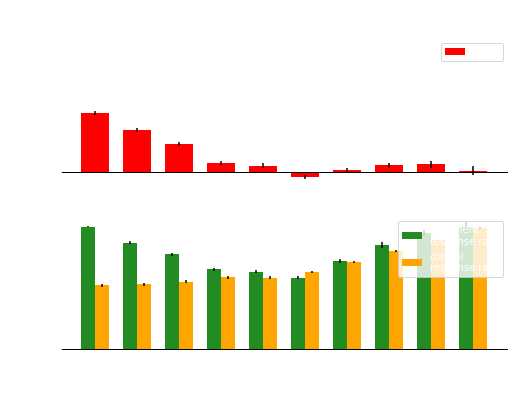

In [273]:
plot_uplift_by_percentile(y_true=y_val, 
                          uplift=uplift, 
                          treatment=trmnt_val, 
                          strategy='overall', 
                          kind='bar')

## Churn by percentile

Text(0.5, 1.0, 'sorted churn')

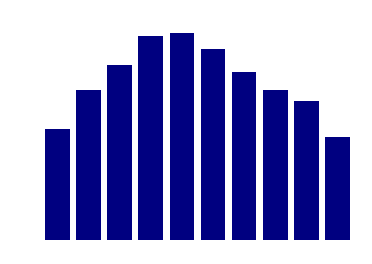

In [275]:
figsize=(8, 6)
plt.bar(range(10), churn_bins, color='navy', label='treatment\nresponse rate')
plt.title('sorted churn')

In [233]:
churn_scores = pd.read_csv("sample_proba_for_uplift.csv")
churn_scores.head()

,Id,Predicted
0,19843,0.790623
1,471287,0.570201
2,342522,0.570201
3,457799,0.570201
4,233778,0.806176


In [234]:
X_val['phone_id'].values

array([139651,  36609,  63251, ..., 156817, 165608, 140626])

In [235]:
common_id = list(set(X_val['phone_id'].values).intersection(set(list(churn_scores['Id'].values))))

In [236]:
churn_scores = churn_scores.set_index('Id').loc[common_id]
churn_scores

,Predicted
Id,
9,0.314361
13,0.607622
131091,0.594043
19,0.317868
131111,0.652469
...,...
131042,0.204657
131057,0.465764
131062,0.756994


In [237]:
uplift_scores = X_val[['phone_id']]
uplift_scores.loc[:, 'uplift'] = uplift
uplift_scores = uplift_scores.set_index('phone_id').loc[common_id]
uplift_scores

,uplift
phone_id,
9,-0.238537
13,0.261881
131091,0.336439
19,0.348105
131111,0.055954
...,...
131042,-0.058854
131057,0.081398
131062,-0.013368


In [238]:
uplift_scores['churn'] = churn_scores['Predicted']

In [247]:
uplift_scores.sort_values(by='uplift', ascending=False)

,uplift,churn
phone_id,,
125719,0.909875,0.099326
127800,0.831282,0.125690
14379,0.824831,0.070545
12594,0.787082,0.135029
18112,0.779619,0.089551
...,...,...
104972,-0.940595,0.152659
101293,-0.943614,0.168952
165697,-0.955357,0.225342


### Sort churn + uplift 

In [256]:
sorted_uplift = uplift_scores.sort_values(by='uplift', ascending=False)

In [264]:
churn_bins = []
for i in range(0, sorted_uplift.shape[0], 3500):
    print(i)
    churn_bins.append(sorted_uplift.iloc[i : i + 3500]['churn'].mean())

0
3500
7000
10500
14000
17500
21000
24500
28000
31500
